In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import tensorflow as tf
from tensorflow import keras

### FashoinMNIST data 불러오기

In [3]:
mnist = keras.datasets.fashion_mnist
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
# train_images, train_labels의 shape 확인
print(train_images.shape, train_labels.shape)

(60000, 28, 28) (60000,)


In [5]:
# test_images, test_labels의 shape 확인
print(test_images.shape, test_labels.shape)

(10000, 28, 28) (10000,)


In [6]:
type(train_images)

numpy.ndarray

In [7]:
# training set의 각 class 별 image 수 확인
unique, counts = np.unique(train_labels, axis=-1, return_counts=True)
dict(zip(unique, counts))

{0: 6000,
 1: 6000,
 2: 6000,
 3: 6000,
 4: 6000,
 5: 6000,
 6: 6000,
 7: 6000,
 8: 6000,
 9: 6000}

In [8]:
# test set의 각 class 별 image 수 확인
unique, counts = np.unique(test_labels, axis=-1, return_counts=True)
dict(zip(unique, counts))

{0: 1000,
 1: 1000,
 2: 1000,
 3: 1000,
 4: 1000,
 5: 1000,
 6: 1000,
 7: 1000,
 8: 1000,
 9: 1000}

### Data 시각화하기

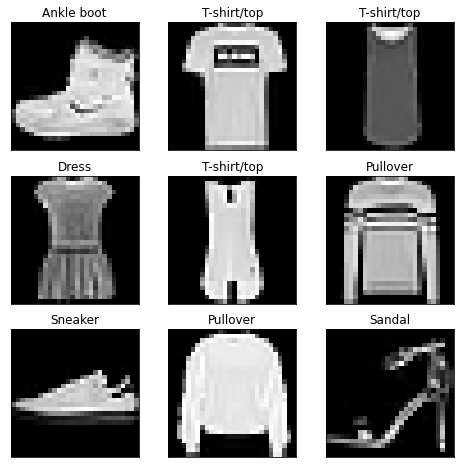

In [10]:
plt.figure(figsize = (8,8))

for i in range(9) :
    plt.subplot(3,3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(class_names[train_labels[i]])
    
plt.show()

### Data 전처리

In [12]:
# image를 0~1사이 값으로 만들기 위하여 255로 나누어줌
# 픽셀값이 0~255 이기 때문에 255로 나누어 값 생성 
train_image = train_images.astype(np.float32) / 255.
test_image = test_images.astype(np.float32) / 255.

# one-hot encoding 
train_labels = keras.utils.to_categorical(train_labels, 10)
test_labels = keras.utils.to_categorical(test_labels, 10)

In [13]:
print(train_image , train_labels)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]] [[0. 0. 0.

### Dataset 만들기

In [14]:
# from_tensor_slices - numpy 배열이 있고 그걸 tensorflow로 넣는 작업 
# 데이터를 특성(feature)과 라벨(label)로 나누어 사용하는 경우 아래와 같이 
# batch 학습 시 이미지가 여러개가 한번에 들어가게 되는데 몇개 씩 넣어줄 건지 정해주는 것 
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(
                buffer_size=100000).batch(64)

test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(64)

Feature batch shape: (64, 28, 28)
Labels batch shape: (64, 10)


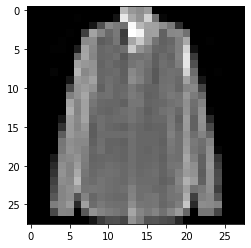

Label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [15]:
# Dataset을 통해 반복하기(iterate)
# 이미지와 정답(label)을 표시합니다.
imgs, lbs = next(iter(train_dataset))
print(f"Feature batch shape: {imgs.shape}")
print(f"Labels batch shape: {lbs.shape}")

img = imgs[0]
lb = lbs[0]
plt.imshow(img, cmap='gray')
plt.show()
print(f"Label: {lb}")

### Custom Dataset 만들기

In [16]:
a = np.arange(10)
print(a)

ds_tensors = tf.data.Dataset.from_tensor_slices(a)
print(ds_tensors)

for x in ds_tensors:
    print (x)

[0 1 2 3 4 5 6 7 8 9]
<TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)


In [17]:
# data 전처리(변환), shuffle, batch 추가
ds_tensors = ds_tensors.map(tf.square).shuffle(10).batch(2)

In [19]:
for _ in range(3) :
    for x in ds_tensors :
        print(x)
    print('='*50)

tf.Tensor([ 0 49], shape=(2,), dtype=int64)
tf.Tensor([ 9 36], shape=(2,), dtype=int64)
tf.Tensor([81 16], shape=(2,), dtype=int64)
tf.Tensor([25 64], shape=(2,), dtype=int64)
tf.Tensor([4 1], shape=(2,), dtype=int64)
tf.Tensor([ 4 81], shape=(2,), dtype=int64)
tf.Tensor([16  9], shape=(2,), dtype=int64)
tf.Tensor([25 49], shape=(2,), dtype=int64)
tf.Tensor([0 1], shape=(2,), dtype=int64)
tf.Tensor([36 64], shape=(2,), dtype=int64)
tf.Tensor([64 49], shape=(2,), dtype=int64)
tf.Tensor([ 4 36], shape=(2,), dtype=int64)
tf.Tensor([1 0], shape=(2,), dtype=int64)
tf.Tensor([ 9 25], shape=(2,), dtype=int64)
tf.Tensor([16 81], shape=(2,), dtype=int64)


## Model

### Keras Sequential API 사용

In [20]:
def create_seq_model():
    model = keras.Sequential()
    # Flatten, 멀리레이어를 1차원 벡터로 변환 
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(128, activation='relu'))
    # Dropout, 오버피팅 제어 
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [21]:
seq_model = create_seq_model()

In [22]:
seq_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Keras Functional API 사용

In [23]:
def create_func_model():
    inputs = keras.Input(shape=(28,28))
    flatten = keras.layers.Flatten()(inputs)
    dense = keras.layers.Dense(128, activation='relu')(flatten)
    drop = keras.layers.Dropout(0.2)(dense)
    outputs = keras.layers.Dense(10, activation='softmax')(drop)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

In [24]:
func_model = create_func_model()

In [25]:
func_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Model Class Subclassing 사용

In [26]:
class SubClassModel(keras.Model):
    def __init__(self):
        super(SubClassModel, self).__init__()
        self.flatten = keras.layers.Flatten(input_shape=(28, 28))
        self.dense1 = keras.layers.Dense(128, activation='relu')
        self.drop = keras.layers.Dropout(0.2)
        self.dense2 = keras.layers.Dense(10, activation='softmax')
    def call(self, x, training=False):
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.drop(x)
        return self.dense2(x)

In [27]:
subclass_model = SubClassModel()

In [28]:
inputs = tf.zeros((1, 28, 28))
subclass_model(inputs)
subclass_model.summary()

Model: "sub_class_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         multiple                  0         
                                                                 
 dense_4 (Dense)             multiple                  100480    
                                                                 
 dropout_2 (Dropout)         multiple                  0         
                                                                 
 dense_5 (Dense)             multiple                  1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [29]:
# 가상의 data 만들어서 예측해보기
inputs = tf.random.normal((1, 28, 28))
outputs = subclass_model(inputs)
pred = tf.argmax(outputs, -1)
print(f"Predicted class: {pred}")

Predicted class: [4]
